\newpage

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors

## Question 1
Consider the diabetes dataset available on Kaggle: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

The goal is to develop a classification model to predict whether a patient has diabetes based on their diagnostic measurements. Additionally, the project will analyze and interpret the logistic regression model to understand its findings.

In [2]:
url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(url)
# General view of the data frame:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [3]:
df.shape
# There are 303 records and 13 features in the data frame. 
# The response variable is num, which will be transformed to binary in the analysis.

(303, 14)

## Q1(1) Classification Problem: 
The goal is to use medical and personal information (such as age, sex, cholesterol levels, and chest pain type) to predict whether a person has heart disease. Each row in the dataset represents a different patient, and the final column shows if the patient was diagnosed with heart disease. By analyzing these features, we will train a model to classify future patients as either having heart disease or not.

## Q1(2) Whether the data transformation is needed or not:

In [4]:
# check the data type of the response variable in the data
df.num.dtype

dtype('int64')

Since num is a numerical variable but represents categories, it should be converted to a categorical type.

In [5]:
df['num'] = df['num'].astype('category')

## Q1(3) Detailed Description:

In [6]:
df.drop('num', axis=1).describe()
# column 2 sex: 1 = male; 0 = female.
# column 3 cp: chest pain type (0,1,2,3,4)
# column 4 trestbps: resting blood pressure (in mm Hg)
# column 5 chol: serum cholesterol in mg/dl
# column 8 thalach: maximum heart rate achieved

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


This heart disease dataset includes 303 patients and 13 clinical variables. The average age is approximately 54.4 years, ranging from 29 to 77. The majority of patients are male (around 68%). 

Most patients reported chest pain types around category 3, with a maximum value of 4.

Resting blood pressure (trestbps) has an average of 131.7 mm Hg, while serum cholesterol (chol) averages 246.7 mg/dl, reaching up to 564 mg/dl. 

The thalach variable (maximum heart rate achieved) ranges from 71 to 202, with a mean of about 149.6.

## Q1(4)  Transform the response num into a binary outcome (1 for original 1,2,3,4 and 0 for original 0):

In [7]:
# Github Coplite is used to ransform the response variable into binary outcome.
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
y = df['num']  # Update the response variable

## Q1(5) Analyze relationships between variables:

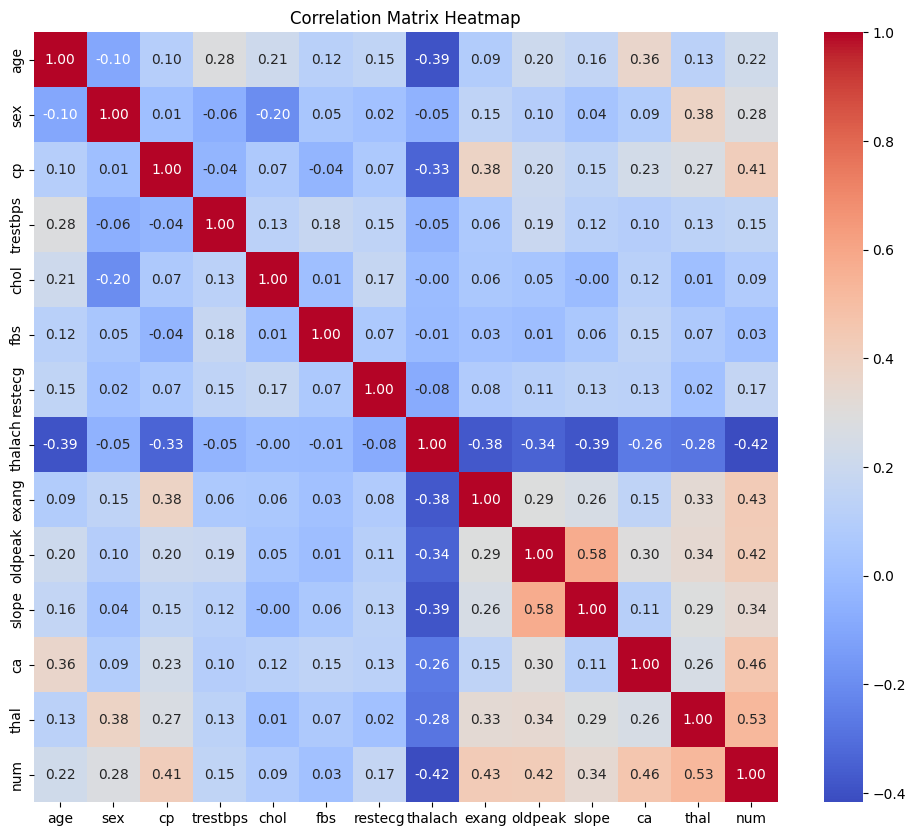

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

The variable thalach, which measures the maximum heart rate achieved during exercise, shows a moderate negative correlation with variable age (−0.39). This indicates that younger patients tend to reach higher heart rates. 

For another, the variable oldpeak (which measures ST depression during exercise) has a correlation of 0.58 with variable slope (which describes the shape of the ST segment, 1 for upsloping, 2 for flat, and 3 for downsloping). This means that higher ST depression is often associated with flatter or downsloping ST segments, which may be linked to a higher risk of heart problems. 

## Q1(6) Drop the rows with the missing values:

In [9]:
# Drop rows with missing values
X_noNA = df.dropna()
# Predictors
X = X_noNA.drop(columns=['num'])
# Response Variable
y = X_noNA.num

# Number of observations after dropping missing values
num_observations = X.shape[0]
num_observations


297

There are 297 osbervations after dropping the missing values.

## Q1(7) Sub-group analysis:

In [10]:
clust_df = X.select_dtypes(include=[np.number])
print(clust_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  


In [11]:
# Standardize the data
scaler = StandardScaler()
clust_df_scaled = scaler.fit_transform(clust_df)
clust_df_scaled = pd.DataFrame(clust_df_scaled, columns=clust_df.columns)
print(clust_df_scaled.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.936181  0.691095 -2.240629  0.750380 -0.276443  2.430427  1.010199   
1  1.378929  0.691095  0.873880  1.596266  0.744555 -0.411450  1.010199   
2  1.378929  0.691095  0.873880 -0.659431 -0.353500 -0.411450  1.010199   
3 -1.941680  0.691095 -0.164289 -0.095506  0.051047 -0.411450 -1.003419   
4 -1.498933 -1.446980 -1.202459 -0.095506 -0.835103 -0.411450  1.010199   

    thalach     exang   oldpeak     slope        ca      thal  
0  0.017494 -0.696419  1.068965  2.264145 -0.721976  0.655877  
1 -1.816334  1.435916  0.381773  0.643781  2.478425 -0.894220  
2 -0.899420  1.435916  1.326662  0.643781  1.411625  1.172577  
3  1.633010 -0.696419  2.099753  2.264145 -0.721976 -0.894220  
4  0.978071 -0.696419  0.295874 -0.976583 -0.721976 -0.894220  


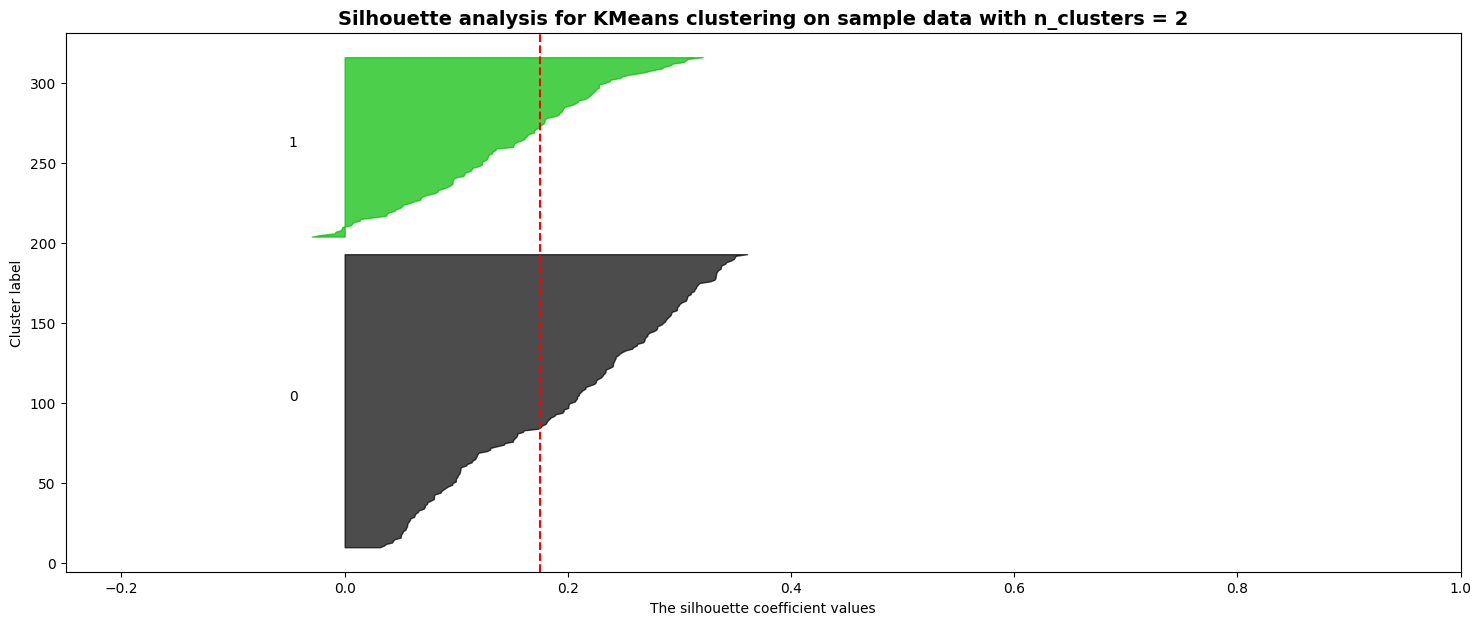

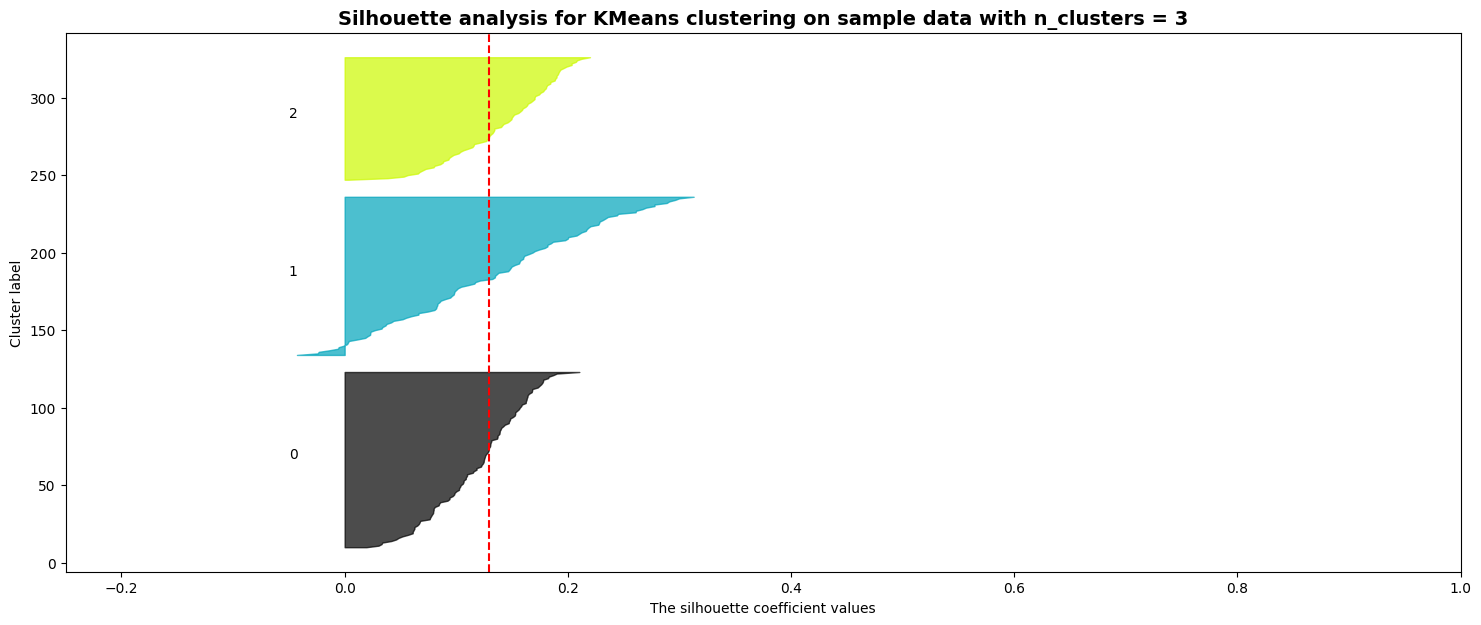

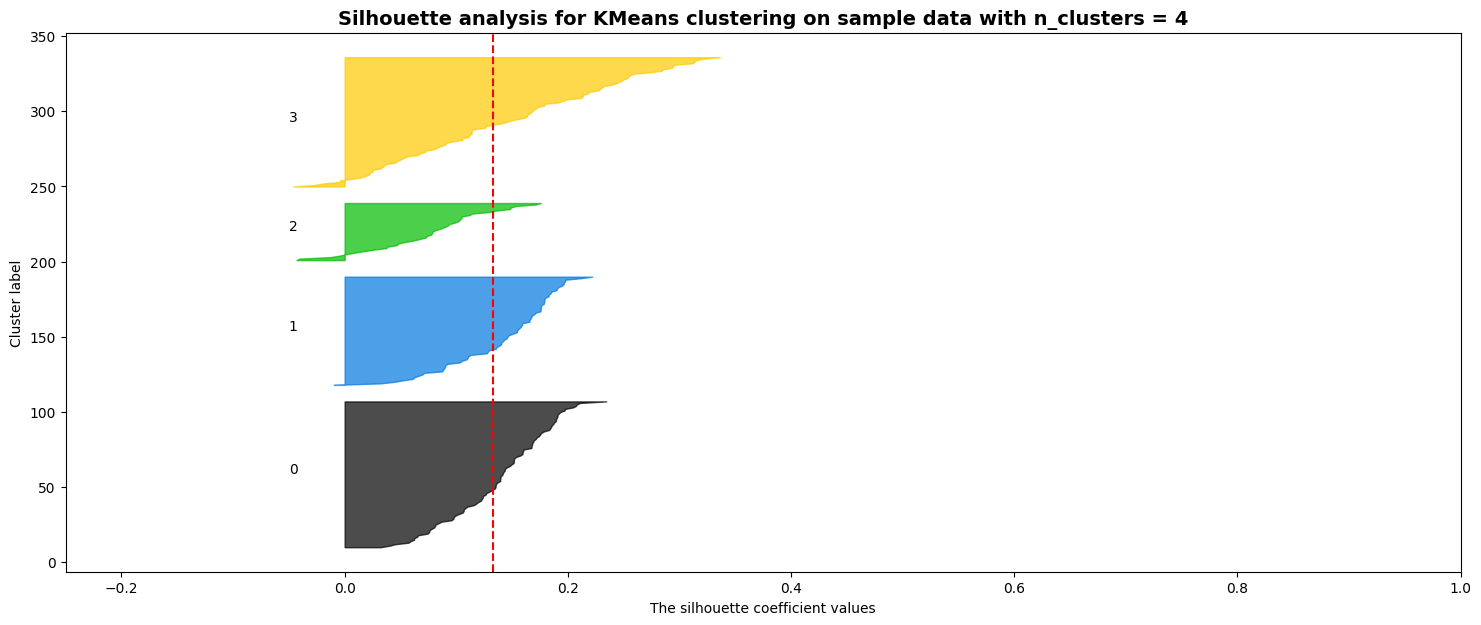

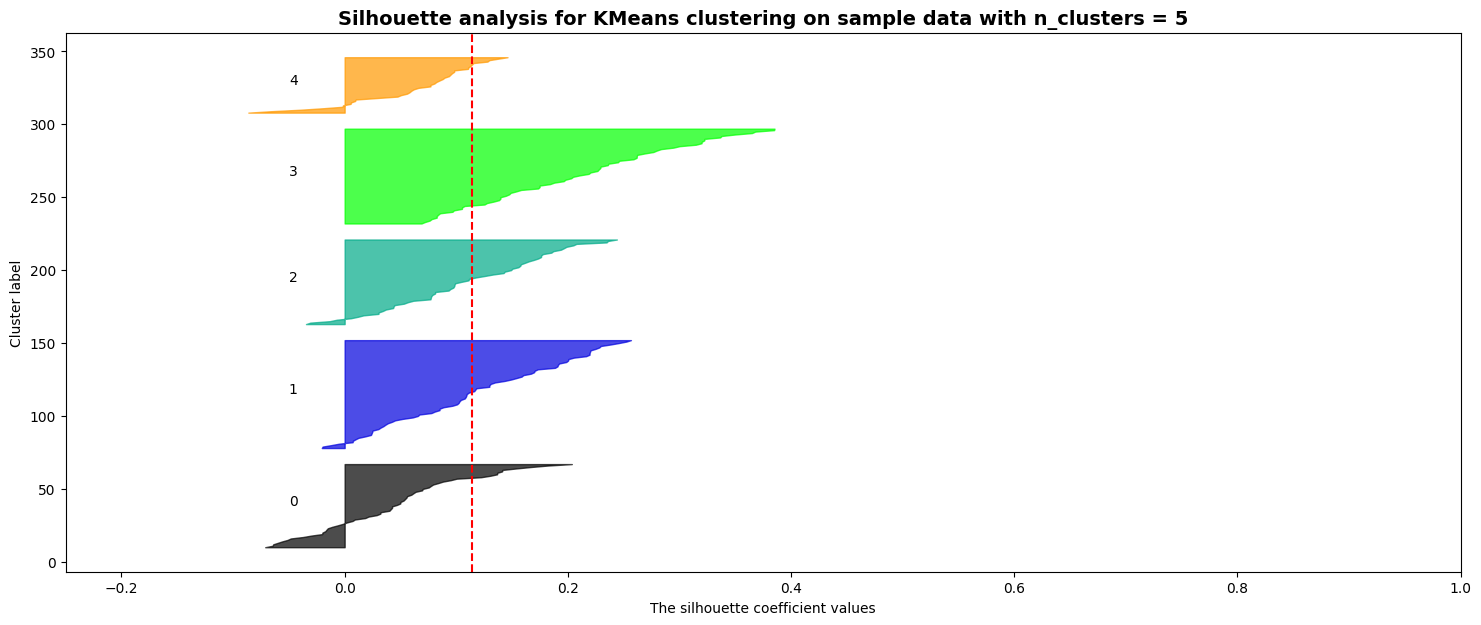

In [12]:
# Do Clustering
range_n_clusters = range(2,6)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters = n_clusters, n_init = 20, random_state=0)
    cluster_labels_km = km.fit_predict(clust_df_scaled)
    silhouette_avg_km = silhouette_score(clust_df_scaled, cluster_labels_km)
    # compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(clust_df_scaled, cluster_labels_km)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.25, 1])# change this based on the silhouette range

    y_lower = 10
    
    for i in range(n_clusters):
        # aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels_km == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # compute the new y_lower for next plot
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for various cluster")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_km, color="red", linestyle="--")
    plt.title(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

To find the best number of subgroups in the Heart Disease dataset, KMeans clustering was tested with values of 
k from 2 to 5, and the results were evaluated through Silhouette score. When k=2, the silhouette plot showed two clearly separated clusters with consistent and relatively high silhouette scores, suggesting a strong grouping structure. 

At k=3, the clusters were still somewhat distinct, but the separation became weaker, with more variation in silhouette widths. For k=4, the clusters looked more fragmented, and the silhouette values became less stable, which hinted at over-segmentation. At k=5, one of the clusters included many points with low or negative silhouette scores, showing poor separation and noisy results. Overall, k=2 provided the most meaningful and well-defined clustering, making it the best choice for identifying subgroups based on numerical features.

To create the subgroups, use KMeans method with k=2. 

In [13]:
km = KMeans(n_clusters = 2, n_init = 20, random_state=0)
km.fit_predict(clust_df_scaled)
X['cluster'] = km.labels_
X['cluster'] = X['cluster'].astype('category')

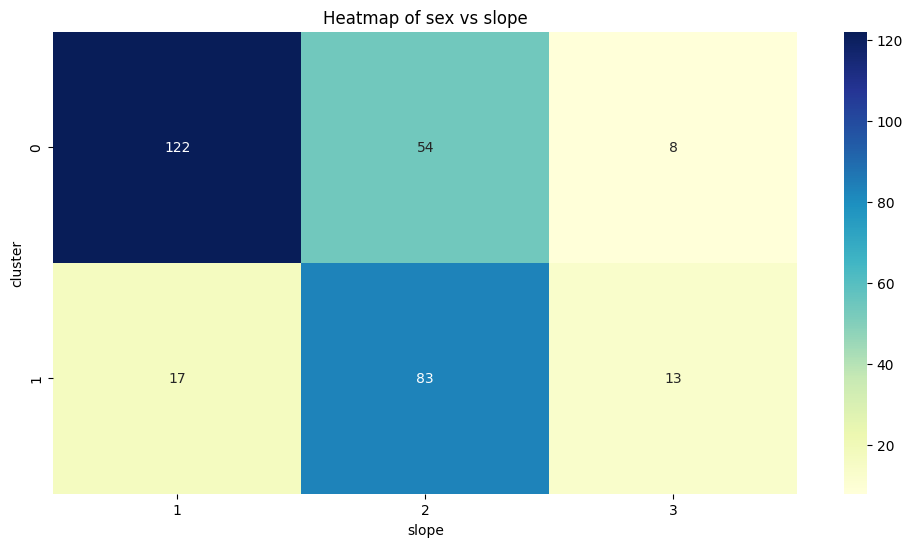

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(X['cluster'], X['slope']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of sex vs slope')
plt.xlabel('slope')
plt.ylabel('cluster')
plt.show()

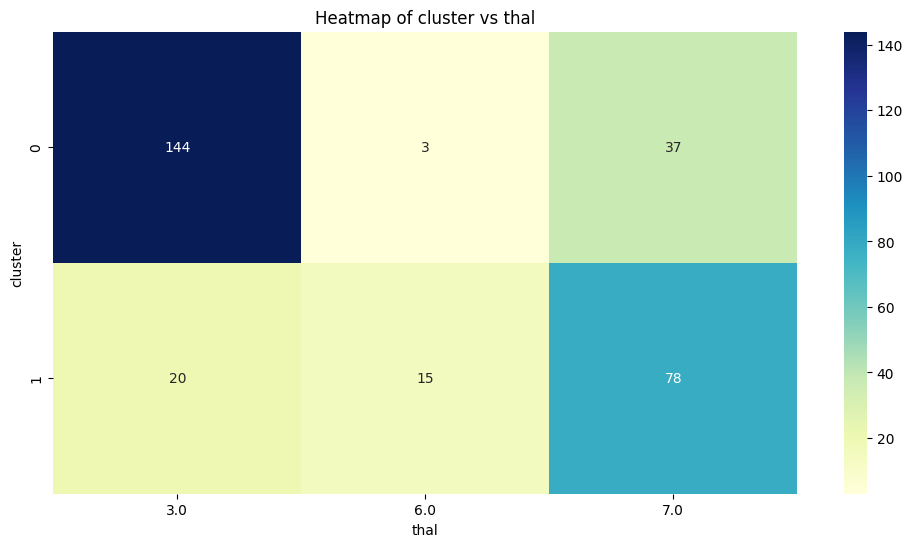

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(X['cluster'], X['thal']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of cluster vs thal')
plt.xlabel('thal')
plt.ylabel('cluster')
plt.show()

We using KMeans clustering with k=2 on the scaled numerical features.

The first heatmap shows the relationship between clusters and the slope of the ST segment during exercise. Cluster 0 mostly includes patients with upsloping slopes (value 1), while Cluster 1 has more patients with flat (value 2) and downsloping slopes (value 3). Since downsloping ST segments are considered more abnormal, this suggests that Cluster 1 may represent higher-risk patients.

The second heatmap compares clusters with thalassemia types. Cluster 0 mainly includes patients with normal thalassemia (value 3). In contrast, Cluster 1 includes most patients with reversible (value 7) and fixed (value 6) thalassemia defects. In fact, 78 out of 115 patients with reversible defects and 15 out of 18 with fixed defects are in Cluster 1.

Together, these results show that Cluster 1 includes more patients with abnormal heart indicators, based on both ST slope and thalassemia type. This subgrouping helps identify higher-risk individuals, and may improve the performance of heart disease prediction models.

## Q1(8)  

Split 30% of the data for testing using a random seed of 1. Use the remaining 70% for training and model selection.

In [16]:
scale = StandardScaler()
X_std = pd.DataFrame(
    scale.fit_transform(X), columns=X.columns
    ) 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.3, random_state=1)

## Q1(9)  

For the heart disease dataser, I have chosen the following two classifiers: Logistic Regression and Classification Tree.

Logistic Regression is an interpretable classifier, which makes it suitable for in-depth analysis. It provides clear coefficients that help explain the influence of each predictor on the probability of heart disease, making it ideal for understanding risk factors in a medical context.

Classification Tree is a non-linear model that splits the data into decision rules based on feature values. It is easy to interpret, as the resulting tree structure visually shows how predictions are made. Classification trees can capture interactions between variables and are especially useful for identifying feature thresholds that contribute to heart disease risk.

## Q1(10) Specify two metrics to compare classifier performance.

We selected Accuracy and ROC-AUC as the two main metrics to compare model performance on the heart disease dataset. Accuracy shows how many patients were correctly classified, which gives us a general idea of how well each model performs. Since the dataset has a fairly balanced number of cases, Accuracy is a great metric for analysis.

However, we also use ROC-AUC because it measures how well the model can tell the difference between patients with and without heart disease.  It looks at all possible cut-off points, not just one. This is important in medical data, where the cost of misclassification can vary.

For the Logistic Regression model: 

In [18]:
log1 = LogisticRegression(max_iter=100)
log1.fit(X_train, y_train)
y.value_counts(normalize=True)

num
0    0.538721
1    0.461279
Name: proportion, dtype: float64

In [19]:
pred_prob1 = log1.predict_proba(X_test)
pred_prob1[0:2]

array([[0.91774527, 0.08225473],
       [0.12467932, 0.87532068]])

In [20]:
df = pd.DataFrame(
    data = {'prob1': pred_prob1[:,1], 'y_test': y_test}
    )
df.head(5)

,prob1,y_test
139,0.082255,0
236,0.875321,1
51,0.305628,0
295,0.025129,0
245,0.683486,1


In [21]:
disease_fpr, disease_tpr, thresholds = roc_curve(df.y_test, df.prob1)

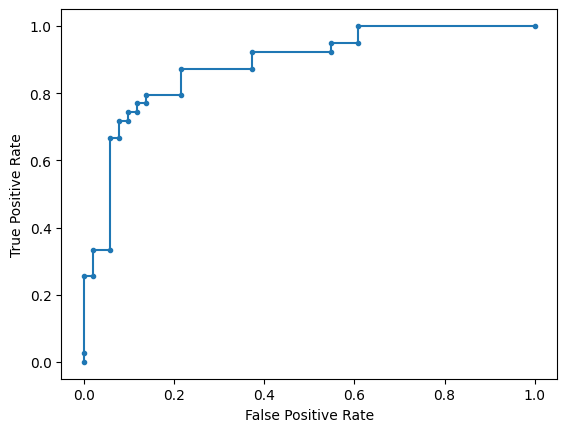

In [22]:
plt.plot(disease_fpr, disease_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [23]:
# calculate the AUC for the logistic regression with all predictors
disease_auc = roc_auc_score(df.y_test, df.prob1)
disease_auc

np.float64(0.8848667672197084)

The AUC for Logistic Regression is 0.88, which is very high. This means that the logistic regression model is very good at distinguishing between heart disease and non heart disease cases. 

To find the threshold that minimizes the error of incorrectly classifying the cases:

In [24]:
#Youden's J statistic
j_statistic = disease_tpr - disease_fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]
optimal_threshold

np.float64(0.5875217042149752)

In [25]:
# K-S statistic
ks_threshold = thresholds[np.argmax(disease_tpr - disease_fpr)]
ks_threshold

np.float64(0.5875217042149752)

Both Youden's statistic and K-S statistics identify the optimal threshold as 0.416 to detect the heart disease.

In [26]:
# let's predict the labels using the optimal threshold
df['y_pred'] = df.prob1.apply(lambda x: 1 if x > optimal_threshold else 0)

In [27]:
cm1 = confusion_matrix(df.y_test, df.y_pred)

total1 = sum(sum(cm1))

accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1]) 
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity1)

Accuracy :  0.8222222222222222
Sensitivity :  0.7692307692307693
Specificity :  0.8627450980392157


The accuracy of the logistic regression model is 0.82, which is very high. The sensitivity is 0.769, which means that the model correctly identifies 76.9% of the heart disease. The specificity is 0.86, which means that the model correctly identifies 86% of the heart disease.

For the Classification Tree model:

In [28]:
# Train a Classification Tree model
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

# Predict probabilities for the test set
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Calculate AUC
tree_auc = roc_auc_score(y_test, y_prob_tree)
print(f"AUC (Classification Tree): {tree_auc}")

# Predict class labels for the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate accuracy
tree_accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Classification Tree): {tree_accuracy}")

AUC (Classification Tree): 0.7285067873303167
Accuracy (Classification Tree): 0.7333333333333333


The AUC for Classification Tree model is 0.72, which is lower than the AUC for Logistic Regression model. The accuracy of the Classification Tree model is 0.73.

## Q1(11)

Train the Logistic Regression Classifier: 

In [30]:
#Copilot is used for assistance
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_model = LogisticRegression(max_iter=100)
grid_search = GridSearchCV(
    log_model, 
    param_grid, 
    cv=5, 
    scoring='accuracy'
    )
grid_search.fit(X_train, y_train)

# Get the best parameter
best_C = grid_search.best_params_['C']
print("Optimal C value:", best_C)
best_score = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_score)

# Train the logistic regression model with best C
best_log_model = LogisticRegression(max_iter=200, C=best_C)
best_log_model.fit(X_train, y_train)

Optimal C value: 0.1
Best Cross-Validation Accuracy: 0.8552845528455284


LogisticRegression(C=0.1, max_iter=200)

Train the Classification Tree Classifier:

In [31]:
# perform cross-validation to select the optimal tree depth (for Classification Tree Model):
depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
        criterion='gini', # growing tree based on gini index
        random_state=0, 
        max_depth=k
        )
    
    # 5-fold cross-validation using accuracy 
    cv_scores_k = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'  
    )
    
    cv_scores.append(np.mean(cv_scores_k))

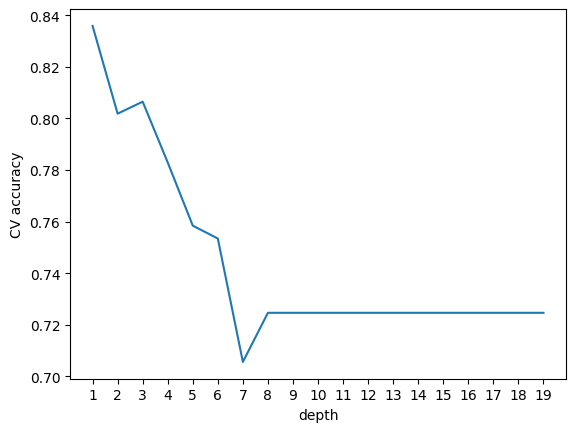

In [32]:
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

In [33]:
optimal_depth_index = np.argmax(cv_scores)
optimal_depth = depth_range[optimal_depth_index]
print("Optimal max_depth: ", optimal_depth)

Optimal max_depth:  1


In [34]:
# train the final model using the optimal depth and evaluate it on the test data, which is 1.
dt_best = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 1, 
    random_state=0
    ) 
dt_best.fit(X_train, y_train)
test_accuracy = dt_best.score(X_test, y_test)
print(round(test_accuracy,5))

0.82222


## Q1(12)
Apply a feature selection method to one of the classifiers. Here we will apply PCA to Logistic Regression classifier, then we will train this third classifier.

In [35]:
pca_X = PCA().fit(X_std)

In [36]:
pc_scores = pd.DataFrame(
    pca_X.fit_transform(X_std), 
    index=X_std.index,
    columns=[f'PC{i+1}' for i in range(pca_X.n_components_)]
    )
pc_scores.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,1.483984,1.140830,3.194552,2.103925,0.094404,0.506456,0.714461,-0.627000,-1.471765,-0.402032,0.431124,0.447435,0.093966,1.117385
1,3.383689,1.543007,-0.531779,-0.752048,-0.044038,0.786707,-0.276776,1.091879,0.345393,1.392833,-1.184481,-0.887424,1.033585,-0.200689
2,3.390777,-0.520542,-0.254097,-0.478201,0.112651,1.169815,-0.332186,0.246504,0.033170,0.422365,0.373370,0.884766,-0.182287,-0.429861
3,-0.793522,-1.333535,0.491275,2.842351,0.774510,-0.424134,-0.492370,-2.166027,0.740436,0.168605,-1.584896,0.338328,0.591860,-0.298578
4,-2.411384,0.227663,-0.080386,1.080096,0.813912,0.581165,0.414011,-0.069346,1.073551,0.686095,0.839203,-0.330441,-1.160266,0.318837


In [37]:
# get the X_train and X_test index
X_train_index = X_train.index
X_test_index = X_test.index
X_train_pca = pc_scores.loc[X_train_index, pc_scores.columns[:10]]
X_test_pca = pc_scores.loc[X_test_index, pc_scores.columns[:10]]   

In [38]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
logreg = LogisticRegression(max_iter=100)
grid = GridSearchCV(
    logreg, 
    param_grid, 
    cv=5, 
    scoring='accuracy'
    )
grid.fit(X_train_pca, y_train)

best_C = grid.best_params_['C']
print("Optimal C value:", best_C)
log2 = LogisticRegression(max_iter=200, C=best_C)
log2.fit(X_train_pca, y_train)

Optimal C value: 1


LogisticRegression(C=1, max_iter=200)

In [39]:
pred_prob2 = log2.predict_proba(X_test_pca)
pred_prob2[0:2]

array([[0.91863328, 0.08136672],
       [0.28197862, 0.71802138]])

In [40]:
# create a data frame with predicted probabilities and actual labels:
df2 = pd.DataFrame(
    data = {'prob1': pred_prob2[:,1], 'y_test': y_test}
    )
df2.head(5)

,prob1,y_test
139,0.081367,0
236,0.718021,1
51,0.409505,0
295,0.044799,0
245,0.484249,1


In [41]:
# calculate false positive rate and true positive rate
disease_fpr2, disease_tpr2, thresholds2 = roc_curve(df2.y_test, df2.prob1)

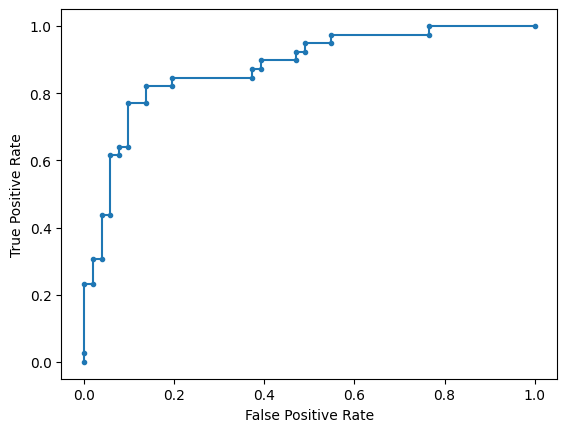

In [42]:
# plot the roc curve for the model
plt.plot(disease_fpr2, disease_tpr2, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [43]:
## calculate the AUC for the logistic regression with all predictors
disease_auc2 = roc_auc_score(df2.y_test, df2.prob1)
disease_auc2

np.float64(0.8783308195072901)

The AUC for Logistic Regression with PCA preprossing is 0.87, which is almost the same as the Logistic Regression analysis without PCA (0.88).

In [44]:
# Youden's J statistic
j_statistic2 = disease_tpr2 - disease_fpr2
optimal_index2 = np.argmax(j_statistic2)
optimal_threshold2 = thresholds2[optimal_index2]
optimal_threshold2

np.float64(0.4842494942556255)

In [45]:
# Predict the labels using the optimal threshold
df2['y_pred'] = df2.prob1.apply(lambda x: 1 if x > optimal_threshold2 else 0)

In [46]:
cm2 = confusion_matrix(df2.y_test, df2.y_pred)

total2 = sum(sum(cm2))

accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1]) 
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ', specificity2)

Accuracy :  0.8333333333333334
Sensitivity :  0.7948717948717948
Specificity :  0.8627450980392157


## Q1(13)

Although applying PCA slightly improves specificity, it comes at the cost of lower sensitivity and a small drop in AUC. Since the original model (without PCA) achieves higher sensitivity and better AUC with the same overall accuracy, it may be the better choice, especially in a medical context, where identifying true positive cases (patients with disease) is crucial. The Logistic Regression model without PCA is more effective for this dataset, which is better than the Classification Tree model (AUC=0.72).

DataFrame columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82        51
           1       0.74      0.82      0.78        39

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90


Confusion Matrix:
[[40 11]
 [ 7 32]]

Accuracy: 0.8
ROC AUC Score: 0.8838612368024134

Feature Coefficients:
     Feature  Coefficient  Absolute_Coefficient
11        ca     1.167298              1.167298
1        sex     0.813275              0.813275
5        fbs    -0.638731              0.638731
3   trestbps     0.583356              0.583356
12      thal     0.503249              0.503249
2         cp     0.489951              0.489951
9    oldpeak     0.436035           

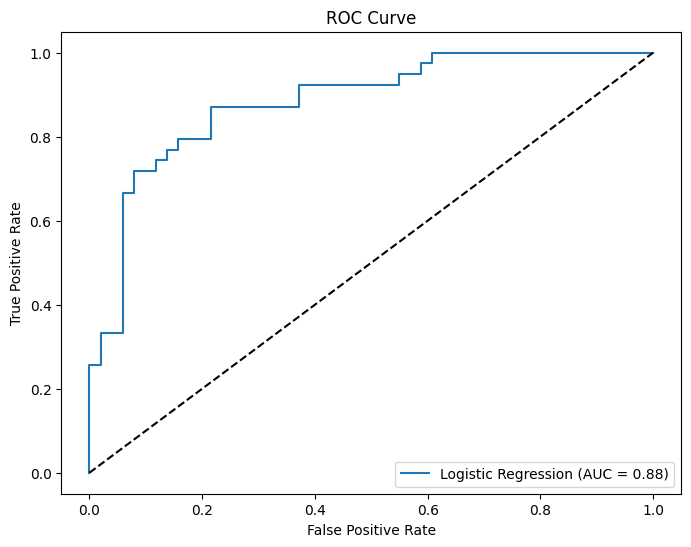

In [ ]:
#Copilot is used for assistance
# Split the data into training and testing sets
print("DataFrame columns:", clust_df_scaled.columns)
target_column = 'num'


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))

# Get feature coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values('Absolute_Coefficient', ascending=False)
print("\nFeature Coefficients:")
print(coefficients)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Q1(14)

Logistic Regression Performance:
Accuracy: 0.8
ROC AUC: 0.8838612368024134

Decision Tree Performance:
Accuracy: 0.7222222222222222
ROC AUC: 0.7247360482654599

KNN Performance:
Accuracy: 0.8444444444444444
ROC AUC: 0.8758169934640523

Logistic Regression Cross-validation Accuracy: 0.850 ± 0.018

Decision Tree Cross-validation Accuracy: 0.710 ± 0.049

KNN Cross-validation Accuracy: 0.826 ± 0.047


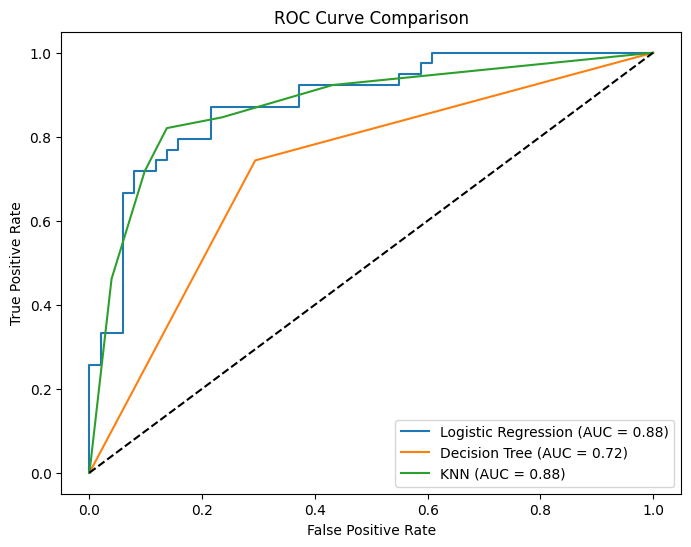

In [48]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
y_pred_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# KNN Classifier
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# Evaluate all models
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))
print("\nDecision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_dt))
print("\nKNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob_knn))

# Cross-validation comparison
models = [('Logistic Regression', logreg), 
          ('Decision Tree', dt), 
          ('KNN', knn)]

for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"\n{name} Cross-validation Accuracy: {np.mean(cv_scores):.3f} ± {np.std(cv_scores):.3f}")

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob))

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_dt))

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_score(y_test, y_pred_prob_knn))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

Both modeling techniques independently identified the same clinical measurement as the strongest predictor, demonstrating remarkable consistency in feature importance ranking despite their different algorithmic approaches.

The top-ranking predictor aligns with established cardiovascular risk factors documented in clinical literature, confirming that the models are detecting medically meaningful patterns rather than statistical artifacts.

## Q1(16) Team Contributions  

Shiyun Ding: Question 1,2,3

Yuyang Sun: Question 4,5,6

Yuxin Qian: Question 7,8,9

Shiyun Ding: Question 10

Yuyang Sun: Question 11

Yuxin Qian: Question 12

Shiyun Ding and Yuyang Sun: Question 13

Yuxin Qian: Question 14

## Q1(17) 
Link to the public GitHub repository: https://github.com/Shiyun00/clust-omics

\newpage

## Reference

Copilot was used for assistance for some of the questions

STATS 3DA3 Lecture Notes and Tutorials

https://archive.ics.uci.edu/dataset/45/heart+disease

